In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import Bio
from Bio import SeqIO
import time
import fem

In [2]:
msa = Bio.SeqIO.parse('PF16592_ncbi.txt', 'fasta')
msa = np.array([np.array(s.seq) for s in msa]).T

In [3]:
m = np.array([len(np.unique(s)) for s in msa])
msa = msa[m > 2]
m = m[m > 2]
n, l = msa.shape
print 'sequence length (n): %i, number of sequences (l): %i' % (n, l)

sequence length (n): 907, number of sequences (l): 1115


In [4]:
np.unique(msa)

array(['-', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N',
       'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'X', 'Y'], dtype='|S1')

In [5]:
msa, cat = fem.fit.categorize(msa)
msa_oh, idx = fem.fit.one_hot(msa, degs=[1])

In [6]:
start = time.time()
 
par, disc = [], []
for i in range(3):
    not_i = list(set(range(n)) - {i})
    x, y = msa[not_i], msa[i]
    res = fem.fit.fit(x, y, degs=[1], overfit=False, iters=20)
    par.append(res[0])
    disc.append(np.squeeze(res[1]))
    
end = time.time()
print '%02f minutes' % ((end-start)/60., )

42.446564 seconds


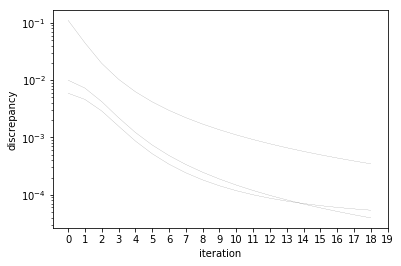

In [23]:
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
for d in disc:
    ax.plot(d, 'k-', lw=0.1)
ax.set_xlabel('iteration')
ax.set_ylabel('discrepancy')
ax.set_yscale('log')
ax.set_xticks(range(20))
plt.show()

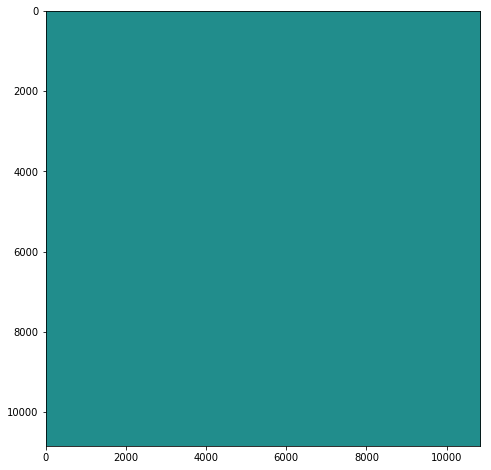

In [8]:
m_sum = m.sum()
m_cumsum = np.insert(m.cumsum(), 0, 0)

w = np.zeros(shape=(m_sum, m_sum))
for i in range(3):
    m1, m2 = m_cumsum[i], m_cumsum[i+1]
    w[m1:m2, :m1] = par[i][1][:,:m1]
    w[m1:m2, m2:] = par[i][1][:,m1:]
    
fig = plt.figure(figsize=(8,8))
ax = plt.gca()
ax.imshow(w)
plt.show()